Loading historical data for Tuk Station using pandas.

In [6]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
import cmocean as cmo
from datetime import datetime
%matplotlib inline

This notebook was derived from [Software Carpentry](https://douglatornell.github.io/2014-09-25-ubc/novice/python-eoas/index.html).

The historical data for Tuk Station is found at [Environment Canada](http://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?searchType=stnName&timeframe=1&txtStationName=tuktoyaktuk&searchMethod=contains&optLimit=yearRange&StartYear=1840&EndYear=2017&Year=2017&Month=2&Day=28&selRowPerPage=25)

The values are strings and are delimited by commas. If we skip the first 16 rows, we can ignore the rows that have station name, coordinates, elevation, and other details. Refer back to the link if you load temperature data as it accomodates the degree sign.

    Index(['Date/Time', 'Year', 'Month', 'Day', 'Time', 'Data Quality',
           'Temp (ÃÂ°C)', 'Temp Flag', 'Dew Point Temp (ÃÂ°C)',
           'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag',
           'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)',
           'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag',
           'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill',
           'Wind Chill Flag', 'Weather'],
          dtype='object')

In [7]:
def load_month(filename):
    path = '../data/for_atmospheric_forcing/'
    data = sep95 = pd.read_csv(path+filename, skiprows=16, encoding='ISO-8859-1')
    return data

In [161]:
sep95 = load_month('eng-hourly-09011995-09301995.csv')
oct95 = load_month('eng-hourly-10011995-10311995.csv')
nov95 = load_month('eng-hourly-11011995-11301995.csv')
dec95 = load_month('eng-hourly-12011995-12311995.csv')
sep02 = load_month('eng-hourly-09012002-09302002.csv')
oct02 = load_month('eng-hourly-10012002-10312002.csv')
aug74 = load_month('eng-hourly-08011974-08311974.csv')
aug75 = load_month('eng-hourly-08011975-08311975.csv')
sep86 = load_month('eng-hourly-09011986-09301986.csv')
mar87 = load_month('eng-hourly-03011987-03311987.csv')
apr87 = load_month('eng-hourly-04011987-04301987.csv')
may87 = load_month('eng-hourly-05011987-05311987.csv')
jun87 = load_month('eng-hourly-06011987-06301987.csv')
jul87 = load_month('eng-hourly-07011987-07311987.csv')
aug87 = load_month('eng-hourly-08011987-08311987.csv')
sep87 = load_month('eng-hourly-09011987-09301987.csv')
oct87 = load_month('eng-hourly-10011987-10311987.csv')
nov87 = load_month('eng-hourly-11011987-11301987.csv')

In [148]:
def convert_times(dates):
    times_all = []
    for ii in range(0, len(dates)):
        times_new = datetime.strptime(dates[ii], '%Y-%m-%d %H:%M')
        times_all.append(times_new)
    return times_all

def get_data_day(data, day):
    wind_speed = np.array(data['Wind Spd (km/h)'])
    date_time = np.array(data['Date/Time'])
    day_index = np.where(data['Day']==day)
    dates_day = convert_times(date_time[day_index])
    wind_speed_day = wind_speed[day_index] * 1000 / 3600
    return dates_day, wind_speed_day

def get_data_range(data, days_start, days_end):
    n_hours = 24
    days_range = np.arange(days_start,days_end+1)
    wind_speed_range = np.zeros((len(days_range),n_hours))
    dates_range = []
    for day, n in zip(days_range, np.arange(len(wind_speed_range))):
        dates_day, wind_speed_day = get_data_day(data, day)
        wind_speed_range[n, :] = wind_speed_day
        dates_range = np.append(dates_range, dates_day)
    wind_speed_range = wind_speed_range.flatten()
    return dates_range, wind_speed_range

def convert_wind_stress(wind_speed_range):
    wind_stress_range = 1.25 * (1.5 * 10**-3) * (wind_speed_range**2)
    return wind_stress_range

def combine_ranges(data_list, start_list, end_list):
    date_all = []
    speed_all = []
    stress_all = []

    for data, start, end in zip(data_list, start_list, end_list):
        dates, speed = get_data_range(data, start, end)
        stress = convert_wind_stress(speed)

        date_all = np.append(date_all, dates)
        speed_all = np.append(speed_all, speed)
        stress_all = np.append(stress_all, stress)
    
    return date_all, speed_all, stress_all

def plot_range(dates, wind_stress, title):
    fig, ax = plt.subplots(1,1,figsize=(20,5))
    ax.plot(dates, wind_stress, linewidth=1.5, color='royalblue')
    ax.set_ylabel('Wind Stress [Nm$^{-2}$]', fontsize=14)
    ax.yaxis.grid()
    ax.set_title(title, fontsize=14)
    ax.set_ylim([0, 0.30])
    return fig, ax

def upwelling_event(ax, date_all, year, month, day, c, label, inds):
    ind = np.where(date_all == datetime(year, month, day, 0, 0))[0][0]
    ax.axvline(date_all[ind], color=c, linewidth=3.5)
    ax.text(date_all[ind-inds], 0.28, label, rotation=90, fontsize=14)
    return ax

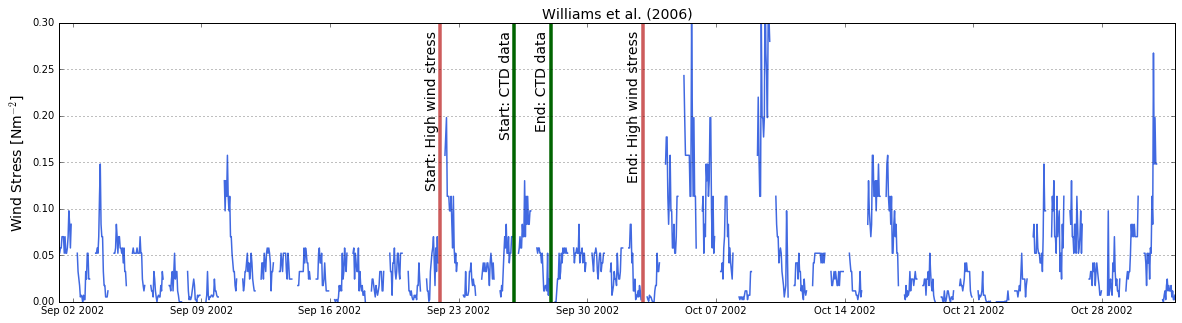

In [149]:
data_list = [sep02, oct02]
start_list = [1,1]
end_list = [30,31]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, 'Williams et al. (2006)')
ax = upwelling_event(ax, date_all, 2002, 9, 22, 'indianred', 'Start: High wind stress', 20)
ax = upwelling_event(ax, date_all, 2002, 10, 3, 'indianred', 'End: High wind stress', 20)
ax = upwelling_event(ax, date_all, 2002, 9, 26, 'darkgreen', 'Start: CTD data', 20)
ax = upwelling_event(ax, date_all, 2002, 9, 28, 'darkgreen', 'End: CTD data', 20)

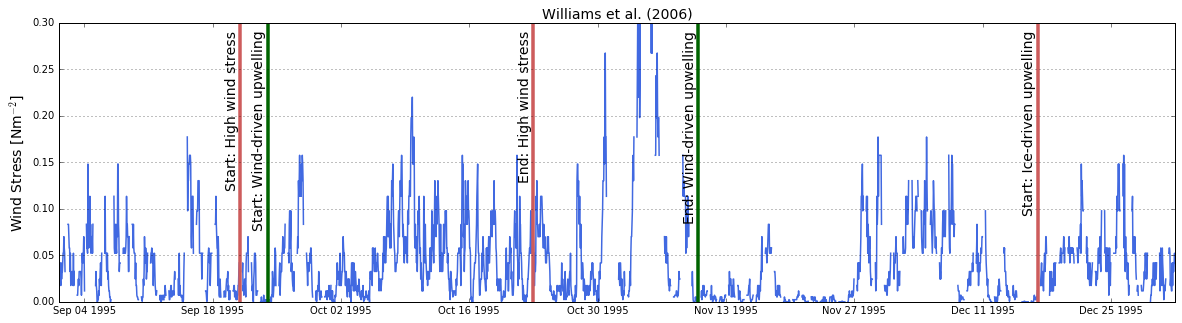

In [129]:
data_list = [sep95, oct95, nov95, dec95]
start_list = [1,1,1,1]
end_list = [30,30,30,31]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, 'Williams et al. (2006)')
ax = upwelling_event(ax, date_all, 1995, 12, 17, 'indianred', 'Start: Ice-driven upwelling', 40)
ax = upwelling_event(ax, date_all, 1995, 9, 21, 'indianred', 'Start: High wind stress', 40)
ax = upwelling_event(ax, date_all, 1995, 10, 23, 'indianred', 'End: High wind stress', 40)
ax = upwelling_event(ax, date_all, 1995, 9, 24, 'darkgreen', 'Start: Wind-driven upwelling', 40)
ax = upwelling_event(ax, date_all, 1995, 11, 10, 'darkgreen', 'End: Wind-driven upwelling', 40)

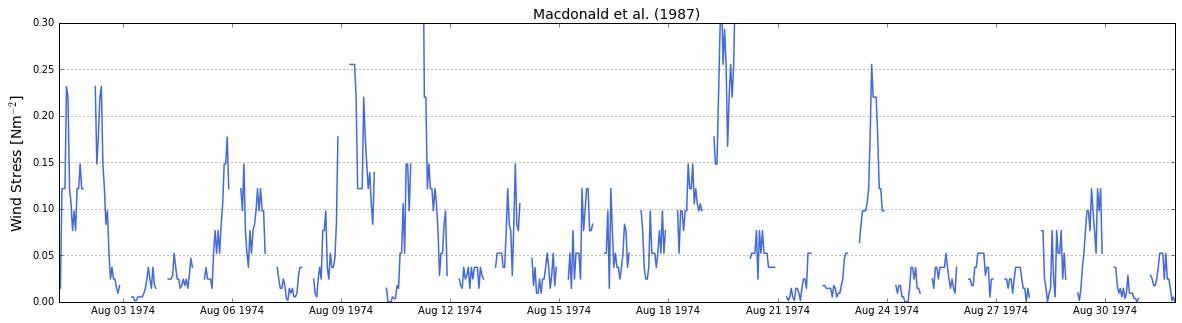

In [132]:
data_list = [aug74]
start_list = [1]
end_list = [31]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, 'Macdonald et al. (1987)')

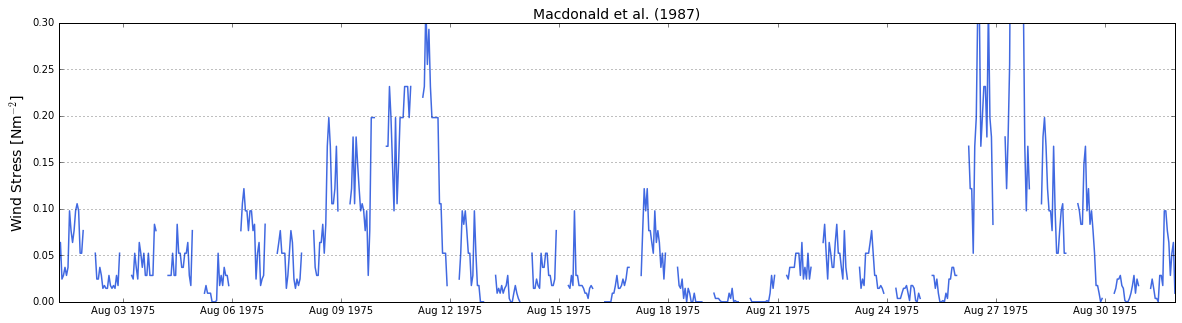

In [134]:
data_list = [aug75]
start_list = [1]
end_list = [31]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, 'Macdonald et al. (1987)')

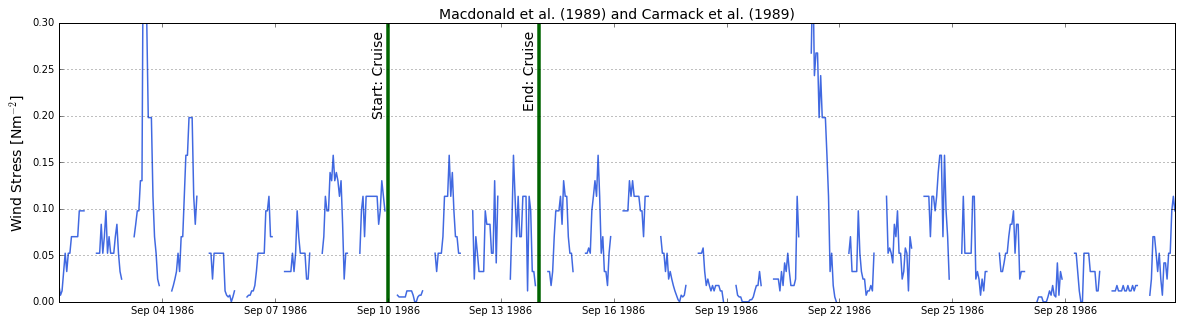

In [138]:
data_list = [sep86]
start_list = [1]
end_list = [30]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, 'Macdonald et al. (1989) and Carmack et al. (1989)')
ax = upwelling_event(ax, date_all, 1986, 9, 10, 'darkgreen', 'Start: Cruise', 10)
ax = upwelling_event(ax, date_all, 1986, 9, 14, 'darkgreen', 'End: Cruise', 10)

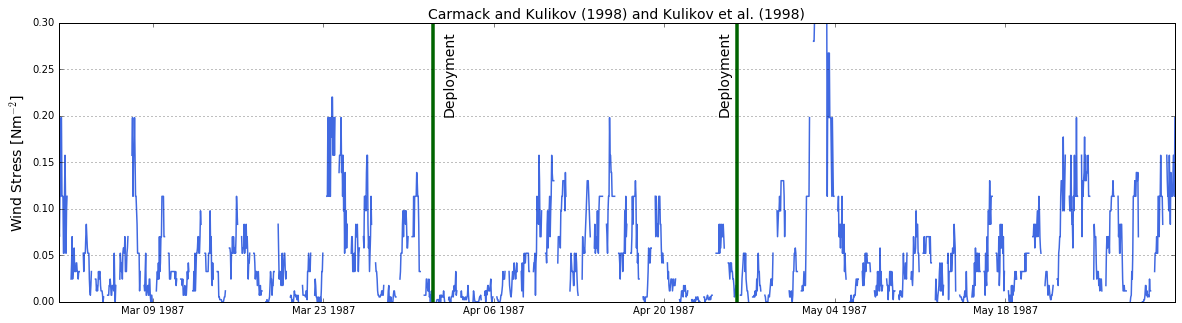

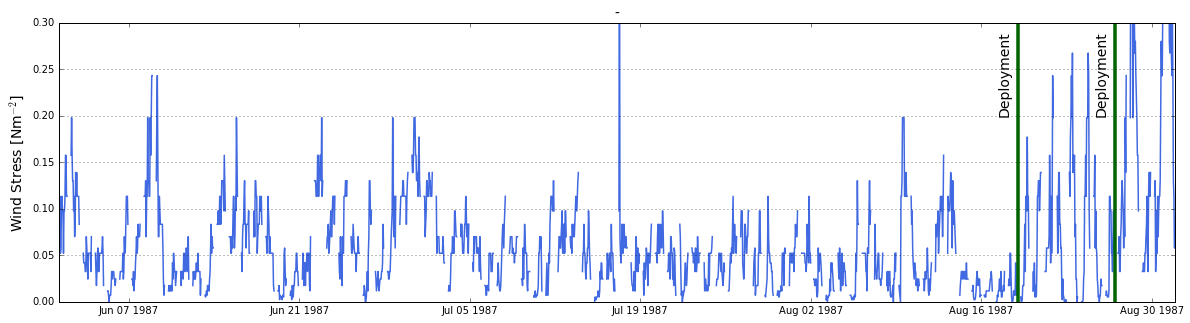

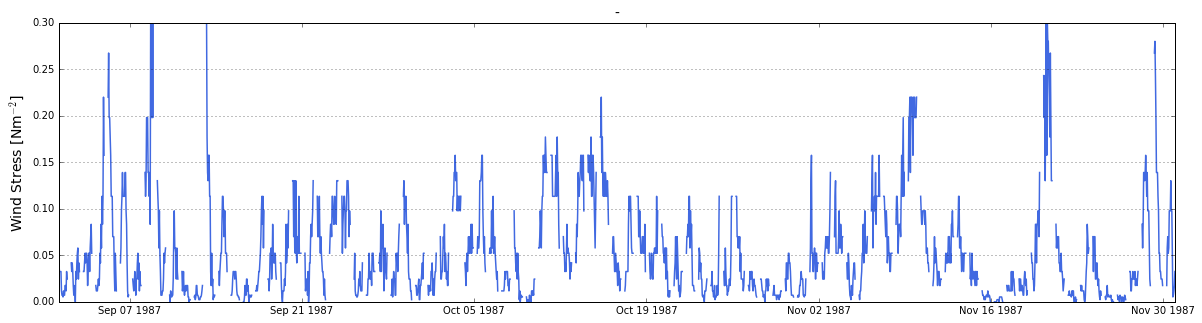

In [162]:
data_list = [mar87, apr87, may87]
start_list = [1,1,1]
end_list = [31,30,31]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, 'Carmack and Kulikov (1998) and Kulikov et al. (1998)')
ax = upwelling_event(ax, date_all, 1987, 4, 1, 'darkgreen', 'Deployment', -20)
ax = upwelling_event(ax, date_all, 1987, 4, 26, 'darkgreen', 'Deployment', 40)

data_list = [jun87, jul87, aug87]
start_list = [1,1,1]
end_list = [30,31,31]
date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, '-')
ax = upwelling_event(ax, date_all, 1987, 8, 19, 'darkgreen', 'Deployment', 40)
ax = upwelling_event(ax, date_all, 1987, 8, 27, 'darkgreen', 'Deployment', 40)


data_list = [sep87, oct87, nov87]
start_list = [1,1,1]
end_list = [30,31,30]

date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
fig, ax = plot_range(date_all, stress_all, '-')
